<a href="https://colab.research.google.com/github/sarthaksolow/VPeakFit/blob/main/injury_prediction(raw).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df=pd.read_csv('/content/injury_data.csv')
df.head(20)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


In [87]:
df['Likelihood_of_Injury'].value_counts()

,count
Likelihood_of_Injury,
0,500
1,500


In [88]:
def categorize_intensity(value):
    if value < 0.3:
        return 0  # Low intensity
    elif 0.3 <= value <= 0.7:
        return 1  # Moderate intensity
    else:
        return 2  # High intensity

df['Training_Intensity'] = df['Training_Intensity'].apply(categorize_intensity)
df['Training_Intensity'].value_counts()

,count
Training_Intensity,
1,423
0,303
2,274


In [89]:
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,1,5,0
1,37,70.996271,174.581650,0,0,6,1
2,32,80.093781,186.329618,0,1,2,1
3,28,87.473271,175.504240,1,0,4,1
4,25,84.659220,190.175012,0,1,1,1
...,...,...,...,...,...,...,...
995,23,99.147910,165.290912,0,0,3,1
996,23,75.799934,178.132281,1,2,1,0
997,20,78.479061,173.823908,0,0,1,1
998,24,66.915802,197.616889,1,2,2,0


In [90]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [91]:
X

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time
0,24,66.251933,175.732429,1,1,5
1,37,70.996271,174.581650,0,0,6
2,32,80.093781,186.329618,0,1,2
3,28,87.473271,175.504240,1,0,4
4,25,84.659220,190.175012,0,1,1
...,...,...,...,...,...,...
995,23,99.147910,165.290912,0,0,3
996,23,75.799934,178.132281,1,2,1
997,20,78.479061,173.823908,0,0,1
998,24,66.915802,197.616889,1,2,2


In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:
X

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time
0,24,66.251933,175.732429,1,1,5
1,37,70.996271,174.581650,0,0,6
2,32,80.093781,186.329618,0,1,2
3,28,87.473271,175.504240,1,0,4
4,25,84.659220,190.175012,0,1,1
...,...,...,...,...,...,...
995,23,99.147910,165.290912,0,0,3
996,23,75.799934,178.132281,1,2,1
997,20,78.479061,173.823908,0,0,1
998,24,66.915802,197.616889,1,2,2


In [94]:
df.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.971000,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.759431,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000000,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.000000,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,1.000000,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,2.000000,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,2.000000,6.000000,1.00000


<Axes: xlabel='Previous_Injuries', ylabel='Likelihood_of_Injury'>

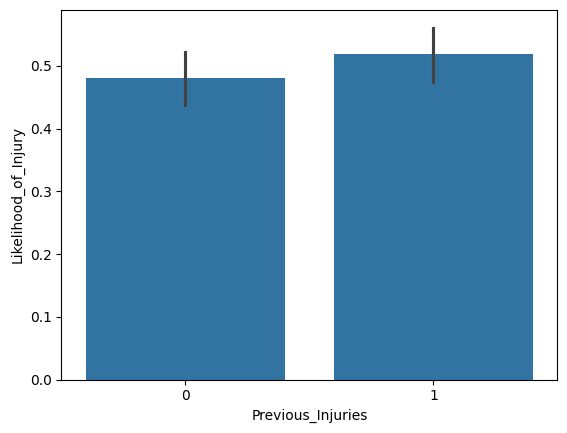

In [95]:
sns.barplot(x='Previous_Injuries',y='Likelihood_of_Injury',data=df)

**XG** **BOOST**

In [96]:
df.isna().sum()

,0
Player_Age,0
Player_Weight,0
Player_Height,0
Previous_Injuries,0
Training_Intensity,0
Recovery_Time,0
Likelihood_of_Injury,0


In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [98]:
X_train.shape

(600, 6)

In [99]:
X_test.shape

(400, 6)

In [100]:
from xgboost import XGBClassifier
model_xg= XGBClassifier(n_estimators=2000, learning_rate=0.05,n_jobs = 10)

In [101]:
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=10,
              num_parallel_tree=None, random_state=None, ...)

In [102]:
Y_train_pred=model_xg.predict(X_train)
Y_test_pred=model_xg.predict(X_test)
accuracy_score(y_test,Y_test_pred)

0.4625

**logistic** **regression**

In [103]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_pred_lr=LR.predict(X_test)
accuracy_score(y_test,y_pred_lr)

0.52

**ANN**

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [106]:
model_ann=Sequential()
model_ann.add(Dense(250,activation='relu'))
model_ann.add(Dense(100,activation='relu'))
model_ann.add(Dense(1,activation='sigmoid'))

In [107]:
model_ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
model_ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4848 - loss: 2.2360
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 1.0464 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4729 - loss: 1.0009 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5388 - loss: 0.7268  
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4897 - loss: 0.9116 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5121 - loss: 0.7243
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4985 - loss: 0.8042 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5256 - loss: 0.7646 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5115 - loss: 0.8469 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5235 - loss: 0.7226 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 0.7310 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [109]:
y_pred_ann=model_ann.predict(X_test)
y_pred_ann=np.where(y_pred_ann>0.5,1,0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [110]:
accuracy_score(y_test,y_pred_ann)

0.4925

building a predictive system

In [111]:
input_data=([36,	79.038206,	181.523155,	1,	0.820696,	3		])
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model_xg.predict(input_data_reshaped)
print(prediction)

[1]


TIPS USING GEN AI

In [112]:
!pip install -q -U google-generativeai

In [113]:
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [114]:
model=genai.GenerativeModel('gemini-pro')

In [115]:
class Tips:
    def __init__(self, model):
        self.model = model

    def generate_tips(self, target_area, goal):
        prompt = f"Based on the user's fitness goals: '{goal}', and target area: '{target_area}', recommend some tips to avoid injury in their sport/target."

        response = self.model.generate_content(prompt)
        return response.text


model = genai.GenerativeModel('gemini-pro')
recommender = Tips(model=model)

target_area = "stamina"
goal = "to run a half marathon"

tips = recommender.generate_tips(target_area, goal)
print(tips)


**Tips to Avoid Injury While Training for a Half Marathon**

**1. Start Gradually:**

* Begin with short, easy runs and gradually increase distance and intensity over time.
* Allow your body to adapt and strengthen before pushing it too hard.

**2. Proper Footwear and Gear:**

* Invest in well-cushioned running shoes that provide support and stability.
* Choose moisture-wicking clothing to prevent chafing.

**3. Cross-Training:**

* Engage in activities such as swimming, cycling, or strength training to build overall fitness without putting excess stress on your running muscles.
* This helps reduce the risk of imbalances and injuries.

**4. Focus on Form:**

* Maintain an upright posture with your core engaged.
* Take short, light steps and land on your midfoot to minimize impact on joints.

**5. Listen to Your Body:**

* Pay attention to any pain or discomfort during or after runs.
* If you experience sharp pain, swelling, or numbness, stop running and seek medical advice.

**6. Recov

**PICKLE**

In [116]:
import pickle

In [118]:
filename = 'injury_model.sav'
pickle.dump(model_xg, open(filename, 'wb'))

In [119]:
loaded_model=pickle.load(open('injury_data.sav','rb'))

In [130]:
input_data = [36, 79.038206, 181.523155, 1, 0.820696, 3]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model_xg.predict(input_data_reshaped)

if prediction[0] == 0:
    print("very low chances of injury")
else:
    print(" pretty high chances of an injury")
    class Tips:  # Make sure this class is indented at the same level as the 'else'
        def __init__(self, model):
            self.model = model

        def generate_tips(self, target_area, goal):
            prompt = f"Based on the user's fitness goals: '{goal}', and target area: '{target_area}', recommend some tips to avoid injury in their sport/target."
            response = self.model.generate_content(prompt)
            return response.text

    # The following lines should be indented at the same level as the 'class Tips' definition
    model = genai.GenerativeModel('gemini-pro')
    recommender = Tips(model=model)

    target_area = "to imrprove my pull up count"
    goal = "being able to do at least 15 pull ups continously"

    tips = recommender.generate_tips(target_area, goal)
    print(tips)




 pretty high chances of an injury
**Tips to Avoid Injury When Training for Pull-Ups:**

**Warm-Up and Cool-Down Thoroughly:**

* Begin with 5-10 minutes of light cardio, such as jogging or jumping jacks, to increase blood flow to the muscles.
* Dynamically stretch muscles involved in pull-ups, such as the lats, shoulders, and arms.
* After your workout, hold static stretches for 20-30 seconds to improve flexibility and reduce muscle soreness.

**Use Proper Form:**

* Grip the bar slightly wider than shoulder-width apart, with palms facing forward.
* Engage your lats by pulling your shoulder blades down and back, then pull upward, keeping your elbows close to your body.
* Lower yourself back to the starting position by controlling the movement and resisting the pull of gravity.

**Gradually Increase Intensity:**

* Start by performing assisted pull-ups using a resistance band or machine to reduce the amount of bodyweight you have to lift.
* Gradually increase the assistance as you get s